# Получение данных русского геоглифа

In [26]:
%matplotlib inline

In [2]:
# import json
import pandas as pd

При взгляде с горы на Урале открывается такой вид:

![](geoglyph.jpg)

[подробнее](https://www.livescience.com/23884-nazca-lines-russia-geoglyphs.html)

На сайте картографического сервиса объект обведен контуром.

![](geoglif_wikimapia.jpg)



При выборе в выпадающем меню "Редактировать контур" на сервер уходит запрос
```
http://wikimapia.org/ajax/getPolygon/?id=20477251
```
в ответ приходит строка с координатами контура.

In [2]:
s="591899049;549428132;01fd4506fcfd2b051efbcf05f3fb4705baf4790dc6de0cfa59f7d5fedaf766ff18fd10fe12fde6022be8bdfd96ed08fc2502effccf0573fb4d05a8fb7c0340fd490035fef9ff44ff84fea2004dfc8a0153fa210473f9b6058bfb2e0670fcf50474fdcb008bfb2dffb2fc8afe6dff0eff290085fdc40416fb6d07ddf8b6082bf98f0664fc62053dfd2b0142fe6fff79fecbfa8cfd78fd46fd78ffe4f51a0001f47f0036fdf50902f7af01e3ffc1044c084e02d4052d02ee1185017903bb01760106029f001f03abfcbf0390fd2b0680fb000390fc630217fe7e0142ffe00127008bff95017ffc530476f965057afadd052d00f1008a021900000416fd6905c3fb9a06eaf9ad0284ff090192005d00510171fe530331fb7c055bfa06061400000134024e01ce091e02d406640191044c006c0269ffd101e2ff4609a4f8f307dcfaf00522fd4c03c6fe3102b9ff83015d0106fd960456fdcc037dfd1003f9fc6f0446fe0102d4ff4301fa003601ff033f01420340fff102effe5f03fbfb8b024efca00269fa3802b9faf1024ffc440283fdf30325fe4f02effff002d4ffe001e3012500000191ff7901a0fd2b04d0"

По-видимому, первые два числа - координаты, а дальше - бинарная информация: или сжатая или числа в 16-ричной системе.

О бинарном формате [программного интерфейса викимапии, (Wikimapia API)](http://wikimapia.org/wiki/API) есть информация тут http://wikimapia.org/wiki/API_box#Binary :

первые два байта - длина, остальные парные координаты

In [9]:
0x1fd

509

In [11]:
(858-2)/2

428.0

как бы там ни было, по ответу на http://stackoverflow.com/questions/24568955/how-to-get-the-coordinates-of-the-polygon-area следует, что можно получить координаты по запросу к API

Этот запрос возвращает данные по `title": "Geoglyph \"Elk\""`, включая полигон.

http://api.wikimapia.org/?key=example&function=place.search&id=20477251&lat=54.942847&lon=59.191664&format=json&pack=&language=en&data_blocks=geometry%2C

In [8]:
o={"id":20477251,"language_id":0,"language_iso":"en","urlhtml":"<a class=\"wikimapia-link\" href=\"http:\/\/wikimapia.org\/20477251\/Geoglyph-Elk\">Geoglyph \"Elk\"<\/a>","title":"Geoglyph \"Elk\"","tags":[{"id":44605,"title":"interesting place"},{"id":46096,"title":"geoglyph"}],"distance":0,"polygon":[{"x":59.1899049,"y":54.9428132},{"x":59.1899747,"y":54.9426344},{"x":59.1900471,"y":54.9425034},{"x":59.1901543,"y":54.9423511},{"x":59.1902751,"y":54.9422045},{"x":59.1905701,"y":54.9418519},{"x":59.1914392,"y":54.9419965},{"x":59.1916482,"y":54.9420258},{"x":59.1918683,"y":54.9420489},{"x":59.1919434,"y":54.9420982},{"x":59.1919971,"y":54.9420427},{"x":59.1925925,"y":54.9421044},{"x":59.193078,"y":54.942203},{"x":59.1930029,"y":54.9422846},{"x":59.1928634,"y":54.9424048},{"x":59.1927186,"y":54.9425203},{"x":59.1926354,"y":54.9425897},{"x":59.1926301,"y":54.9426159},{"x":59.1926488,"y":54.9426282},{"x":59.1926837,"y":54.9426205},{"x":59.1927722,"y":54.9425866},{"x":59.1929224,"y":54.9424727},{"x":59.1930833,"y":54.9423308},{"x":59.1932066,"y":54.942166},{"x":59.1932844,"y":54.942052},{"x":59.1933408,"y":54.9420381},{"x":59.1934642,"y":54.9420458},{"x":59.1935527,"y":54.942086},{"x":59.1935768,"y":54.9421074},{"x":59.1935635,"y":54.9421645},{"x":59.1934589,"y":54.9422815},{"x":59.1932576,"y":54.942468},{"x":59.1930485,"y":54.9426328},{"x":59.1928849,"y":54.9427253},{"x":59.1927508,"y":54.9427977},{"x":59.1927186,"y":54.9428377},{"x":59.192732,"y":54.9428685},{"x":59.1928715,"y":54.9429332},{"x":59.1929412,"y":54.9429979},{"x":59.1929439,"y":54.9432768},{"x":59.1929438,"y":54.9435712},{"x":59.1929384,"y":54.9436234},{"x":59.1927078,"y":54.9438362},{"x":59.1926595,"y":54.9438424},{"x":59.1925495,"y":54.9436298},{"x":59.1924771,"y":54.9434973},{"x":59.1924021,"y":54.9430488},{"x":59.1923644,"y":54.9429533},{"x":59.192327,"y":54.9429271},{"x":59.1922599,"y":54.942924},{"x":59.192166,"y":54.9430072},{"x":59.1920748,"y":54.9430796},{"x":59.1919084,"y":54.9432075},{"x":59.1918172,"y":54.9432999},{"x":59.1917637,"y":54.9433384},{"x":59.1917315,"y":54.9433415},{"x":59.191702,"y":54.9433276},{"x":59.1917126,"y":54.9432893},{"x":59.1918066,"y":54.9431751},{"x":59.1919756,"y":54.9430349},{"x":59.192107,"y":54.9429024},{"x":59.1920829,"y":54.9428886},{"x":59.1920292,"y":54.9428886},{"x":59.1919246,"y":54.9429548},{"x":59.1917771,"y":54.9430673},{"x":59.1916001,"y":54.9432291},{"x":59.1915357,"y":54.9432537},{"x":59.1914955,"y":54.9432444},{"x":59.1914874,"y":54.9432075},{"x":59.1915302,"y":54.9431258},{"x":59.1916457,"y":54.9429887},{"x":59.1917986,"y":54.9428331},{"x":59.1917986,"y":54.9428023},{"x":59.1917396,"y":54.9427561},{"x":59.1915062,"y":54.9426837},{"x":59.1913426,"y":54.9426436},{"x":59.1912326,"y":54.9426328},{"x":59.1911709,"y":54.9426374},{"x":59.1911227,"y":54.9426559},{"x":59.1908759,"y":54.9428363},{"x":59.1906747,"y":54.9429658},{"x":59.1905433,"y":54.9430349},{"x":59.1904467,"y":54.9430811},{"x":59.190377,"y":54.9430935},{"x":59.1903421,"y":54.9430673},{"x":59.1904038,"y":54.9429563},{"x":59.1904601,"y":54.942867},{"x":59.1905352,"y":54.9427653},{"x":59.1906264,"y":54.9426559},{"x":59.1906774,"y":54.9425835},{"x":59.1906962,"y":54.9425329},{"x":59.1906908,"y":54.9424818},{"x":59.1906077,"y":54.9424496},{"x":59.1905245,"y":54.942451},{"x":59.1904494,"y":54.9424926},{"x":59.1903475,"y":54.9426066},{"x":59.1902885,"y":54.9426929},{"x":59.1902268,"y":54.9428408},{"x":59.1901571,"y":54.9429702},{"x":59.190098,"y":54.9430657},{"x":59.1900337,"y":54.9431181},{"x":59.1899532,"y":54.9431613},{"x":59.1898781,"y":54.9431628},{"x":59.1898057,"y":54.9431659},{"x":59.1897574,"y":54.9431366},{"x":59.1897574,"y":54.9430965},{"x":59.1897708,"y":54.9430549},{"x":59.1898432,"y":54.9429317}]}
o

{u'distance': 0,
 u'id': 20477251,
 u'language_id': 0,
 u'language_iso': u'en',
 u'polygon': [{u'x': 59.1899049, u'y': 54.9428132},
  {u'x': 59.1899747, u'y': 54.9426344},
  {u'x': 59.1900471, u'y': 54.9425034},
  {u'x': 59.1901543, u'y': 54.9423511},
  {u'x': 59.1902751, u'y': 54.9422045},
  {u'x': 59.1905701, u'y': 54.9418519},
  {u'x': 59.1914392, u'y': 54.9419965},
  {u'x': 59.1916482, u'y': 54.9420258},
  {u'x': 59.1918683, u'y': 54.9420489},
  {u'x': 59.1919434, u'y': 54.9420982},
  {u'x': 59.1919971, u'y': 54.9420427},
  {u'x': 59.1925925, u'y': 54.9421044},
  {u'x': 59.193078, u'y': 54.942203},
  {u'x': 59.1930029, u'y': 54.9422846},
  {u'x': 59.1928634, u'y': 54.9424048},
  {u'x': 59.1927186, u'y': 54.9425203},
  {u'x': 59.1926354, u'y': 54.9425897},
  {u'x': 59.1926301, u'y': 54.9426159},
  {u'x': 59.1926488, u'y': 54.9426282},
  {u'x': 59.1926837, u'y': 54.9426205},
  {u'x': 59.1927722, u'y': 54.9425866},
  {u'x': 59.1929224, u'y': 54.9424727},
  {u'x': 59.1930833, u'y': 54.

In [9]:
D=pd.DataFrame(o['polygon'])
D.head()

,x,y
0,59.189905,54.942813
1,59.189975,54.942634
2,59.190047,54.942503
3,59.190154,54.942351
4,59.190275,54.942205


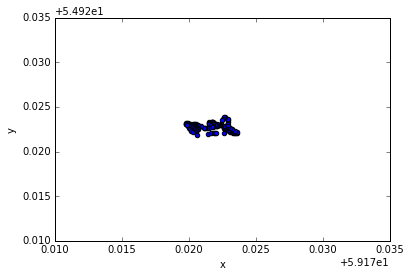

In [10]:
D.plot('x','y',kind='scatter');

Географические координаты измеряются вдоль кривых линей на поверхности эллипсоида (фигуры, близкой к шару).

<img src=geoid.jpg width=50%>

Искажениями кривизны Земли можно пренебречь и получить нормализованные координаты.

![](geoaxes.jpg)

Но размер градуса широты и долготы неодинаков (одинаков только на экваторе), поэтому чтобы восстановить рисунок на плоскости в исходных размерах надо градусы преобразовывать в метры с помощью специальной библиотеки.

In [42]:
D.describe()
# X=(D - D.mean())/D.std().max()

,x,y
count,108.000000,108.000000
mean,59.191677,54.942788
std,0.001131,0.000433
min,59.189757,54.941852
25%,59.190563,54.942501
50%,59.191788,54.942837
75%,59.192690,54.943080
max,59.193577,54.943842


При редактировании контура и сохранении правок на сервер уходит такая строка с координатами полигона (многоугольника):

In [4]:
poly='1475;9613;2173;7825;2897;6515;3969;4992;5177;3526;8127;0;16818;1446;18908;1739;21109;1970;21860;2463;22397;1908;28351;2525;33206;3511;32455;4327;31060;5529;29612;6684;28780;7378;28727;7640;28914;7763;29263;7686;30148;7347;31650;6208;33259;4789;34492;3141;35270;2001;35834;1862;37068;1939;37953;2341;38194;2555;38061;3126;37015;4296;35002;6161;32911;7809;31275;8734;29934;9458;29612;9858;29746;10166;31141;10813;31838;11460;31865;14249;31864;17193;31810;17715;29504;19843;29021;19905;27921;17779;27197;16454;26447;11969;26070;11014;25696;10752;25025;10721;24086;11553;23174;12277;21510;13556;20598;14480;20063;14865;19741;14896;19446;14757;19552;14374;20492;13232;22182;11830;23496;10505;23255;10367;22718;10367;21672;11029;20197;12154;18427;13772;17783;14018;17381;13925;17300;13556;17728;12739;18883;11368;20412;9812;20412;9504;19822;9042;17488;8318;15852;7917;14752;7809;14135;7855;13653;8040;11185;9844;9173;11139;7859;11830;6893;12292;6196;12416;5847;12154;6464;11044;7027;10151;7778;9134;8690;8040;9200;7316;9388;6810;9334;6299;8503;5977;7671;5991;6920;6407;5901;7547;5311;8410;4694;9889;3997;11183;3406;12138;2763;12662;1958;13094;1207;13109;483;13140;0;12847;0;12446;134;12030;858;10798'

In [5]:
poly.count(';')+1

216

In [5]:
s.split(';')[-1].__len__()

858

In [8]:
_5/_3

3.9906976744186045

Попробуем взять координаты из отсылаемой строки. Может они в метрах. Хотя может в долях градусов...

In [45]:
X=pd.to_numeric(poly.split(';'))
X=X.reshape([-1,2])
X=pd.DataFrame(X, columns=['x','y'])
X

,x,y
0,1475,9613
1,2173,7825
2,2897,6515
3,3969,4992
4,5177,3526
5,8127,0
6,16818,1446
7,18908,1739
8,21109,1970
9,21860,2463


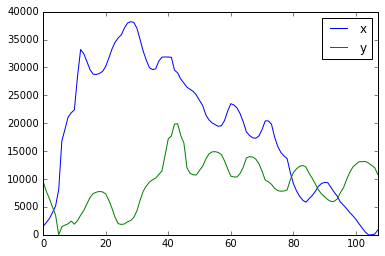

In [46]:
X.plot();

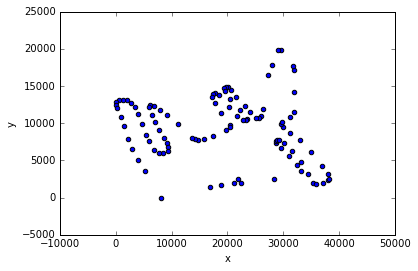

In [47]:
X.plot('x','y', kind='scatter');

In [48]:
X.describe()

,x,y
count,108.000000,108.000000
mean,19195.842593,9358.814815
std,11310.878209,4327.940362
min,0.000000,0.000000
25%,8060.000000,6488.000000
50%,20304.500000,9851.000000
75%,29323.250000,12280.750000
max,38194.000000,19905.000000


In [49]:
X.to_csv('los.csv', sep=b'\t', index=False)

Итого: полученные координаты сохранили в файле `los.csv`.